<a href="https://colab.research.google.com/github/thasniyamansoora/Bike-sharing-demand-predictions/blob/main/Copy_of_Bike_Sharing_Demand_Prediction_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Seoul Bike Sharing Demand Prediction </u></b>

## <b> Problem Description </b>

### Currently Rental bikes are introduced in many urban cities for the enhancement of mobility comfort. It is important to make the rental bike available and accessible to the public at the right time as it lessens the waiting time. Eventually, providing the city with a stable supply of rental bikes becomes a major concern. The crucial part is the prediction of bike count required at each hour for the stable supply of rental bikes.


###1.LOADING LIBRARIES AND MODULES


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


In [2]:
from datetime import datetime
import datetime as dt
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MultiLabelBinarizer

In [3]:
from sklearn.linear_model import LinearRegression 
from sklearn.linear_model import Lasso 
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

In [4]:
from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import RandomizedSearchCV

In [5]:
from sklearn import metrics
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import log_loss

import warnings
warnings.filterwarnings('ignore')
pd.options.display.max_columns=999

### LOADING DATA SET



In [6]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [7]:
bike_df=pd.read_csv('/content/drive/MyDrive/Almabetter/capstone project/supervisedML-Regression /Copy of SeoulBikeData.csv',sep=',',encoding='latin')

### UNDERSTAND MORE ABOUT DATA SET

In [8]:
# shape of the dataset
bike_df.shape

(8760, 14)

The dataset contains 8760 observations and 14 attributes

In [9]:
#data types
bike_df.dtypes

Date                          object
Rented Bike Count              int64
Hour                           int64
Temperature(°C)              float64
Humidity(%)                    int64
Wind speed (m/s)             float64
Visibility (10m)               int64
Dew point temperature(°C)    float64
Solar Radiation (MJ/m2)      float64
Rainfall(mm)                 float64
Snowfall (cm)                float64
Seasons                       object
Holiday                       object
Functioning Day               object
dtype: object

In [10]:
bike_df.head(5)

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [11]:
bike_df.tail(5)

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
8755,30/11/2018,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,Autumn,No Holiday,Yes
8756,30/11/2018,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8757,30/11/2018,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8758,30/11/2018,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,Autumn,No Holiday,Yes
8759,30/11/2018,584,23,1.9,43,1.3,1909,-9.3,0.0,0.0,0.0,Autumn,No Holiday,Yes


In [12]:
print('features of the dataset:')
bike_df.columns

features of the dataset:


Index(['Date', 'Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day'],
      dtype='object')

In [13]:
bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

In [14]:
bike_df.describe().T


,count,mean,std,min,25%,50%,75%,max
Rented Bike Count,8760.0,704.602055,644.997468,0.0,191.00,504.50,1065.25,3556.00
Hour,8760.0,11.500000,6.922582,0.0,5.75,11.50,17.25,23.00
Temperature(°C),8760.0,12.882922,11.944825,-17.8,3.50,13.70,22.50,39.40
Humidity(%),8760.0,58.226256,20.362413,0.0,42.00,57.00,74.00,98.00
Wind speed (m/s),8760.0,1.724909,1.036300,0.0,0.90,1.50,2.30,7.40
Visibility (10m),8760.0,1436.825799,608.298712,27.0,940.00,1698.00,2000.00,2000.00
Dew point temperature(°C),8760.0,4.073813,13.060369,-30.6,-4.70,5.10,14.80,27.20
Solar Radiation (MJ/m2),8760.0,0.569111,0.868746,0.0,0.00,0.01,0.93,3.52
Rainfall(mm),8760.0,0.148687,1.128193,0.0,0.00,0.00,0.00,35.00
Snowfall (cm),8760.0,0.075068,0.436746,0.0,0.00,0.00,0.00,8.80


## <b> Data Description </b>

### <b> The dataset contains weather information (Temperature, Humidity, Windspeed, Visibility, Dewpoint, Solar radiation, Snowfall, Rainfall), the number of bikes rented per hour and date information.</b>


### <b>Attribute Information: </b>

* ### Date : year-month-day
* ### Rented Bike count - Count of bikes rented at each hour
* ### Hour - Hour of he day
* ### Temperature-Temperature in Celsius
* ### Humidity - %
* ### Windspeed - m/s
* ### Visibility - 10m
* ### Dew point temperature - Celsius
* ### Solar radiation - MJ/m2
* ### Rainfall - mm
* ### Snowfall - cm
* ### Seasons - Winter, Spring, Summer, Autumn
* ### Holiday - Holiday/No holiday
* ### Functional Day - NoFunc(Non Functional Hours), Fun(Functional hours)

### DATA CLEANING


In [15]:
#To check for the count of missing values in each columns
bike_df.isnull().sum()


Date                         0
Rented Bike Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
dtype: int64

In [16]:
# checking duplicate values
value=len(bike_df[bike_df.duplicated()])
print('The number of duplicate in the data set is=',value)

The number of duplicate in the data set is= 0




*   So there are no null values and duplicate values in the above data setist i
*   some column names are large so changing it to make it simpler








In [17]:
#Rename the columns
df=bike_df.rename(columns={
'Rented Bike Count':'Rented_Bike_Count',
'Temperature(°C)':'Temperature',
'Humidity(%)':'Humidity',             
'Wind speed (m/s)':'Wind_speed',            
'Visibility (10m)':'Visibility',            
'Dew point temperature(°C)':'Dew_point_temperature',
'Solar Radiation (MJ/m2)':'Solar_Radiation',   
'Rainfall(mm)':'Rainfall',               
'Snowfall (cm)':'Snowfall',               
'Functioning Day':'Functioning_Day' })
df

,Date,Rented_Bike_Count,Hour,Temperature,Humidity,Wind_speed,Visibility,Dew_point_temperature,Solar_Radiation,Rainfall,Snowfall,Seasons,Holiday,Functioning_Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,30/11/2018,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,Autumn,No Holiday,Yes
8756,30/11/2018,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8757,30/11/2018,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8758,30/11/2018,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,Autumn,No Holiday,Yes


### BREAKING DATE COLUMN

In [18]:
from time import strptime
# changing date coloumn to 3 columns 'year' 'month' and 'day' columns
bike_df['Date']= bike_df['Date'].astype('datetime64[ns]')
bike_df['Date']

0      2017-01-12
1      2017-01-12
2      2017-01-12
3      2017-01-12
4      2017-01-12
          ...    
8755   2018-11-30
8756   2018-11-30
8757   2018-11-30
8758   2018-11-30
8759   2018-11-30
Name: Date, Length: 8760, dtype: datetime64[ns]

In [19]:
bike_df['Day']=bike_df['Date'].dt.day_name()
bike_df['Month']=bike_df['Date'].dt.month
bike_df['Year']=bike_df['Date'].dt.year

In [20]:
bike_df.head().T

,0,1,2,3,4
Date,2017-01-12 00:00:00,2017-01-12 00:00:00,2017-01-12 00:00:00,2017-01-12 00:00:00,2017-01-12 00:00:00
Rented Bike Count,254,204,173,107,78
Hour,0,1,2,3,4
Temperature(°C),-5.2,-5.5,-6.0,-6.2,-6.0
Humidity(%),37,38,39,40,36
Wind speed (m/s),2.2,0.8,1.0,0.9,2.3
Visibility (10m),2000,2000,2000,2000,2000
Dew point temperature(°C),-17.6,-17.6,-17.7,-17.6,-18.6
Solar Radiation (MJ/m2),0.0,0.0,0.0,0.0,0.0
Rainfall(mm),0.0,0.0,0.0,0.0,0.0


In [21]:
bike_df['weekend_day'] = bike_df['Day'].apply(lambda x : 1 if x=='Saturday' or x=='Sunday' else 0)
bike_df = bike_df.drop(columns= ['Date','Day','Year'],axis=1)

In [22]:
bike_df.head().T

,0,1,2,3,4
Rented Bike Count,254,204,173,107,78
Hour,0,1,2,3,4
Temperature(°C),-5.2,-5.5,-6.0,-6.2,-6.0
Humidity(%),37,38,39,40,36
Wind speed (m/s),2.2,0.8,1.0,0.9,2.3
Visibility (10m),2000,2000,2000,2000,2000
Dew point temperature(°C),-17.6,-17.6,-17.7,-17.6,-18.6
Solar Radiation (MJ/m2),0.0,0.0,0.0,0.0,0.0
Rainfall(mm),0.0,0.0,0.0,0.0,0.0
Snowfall (cm),0.0,0.0,0.0,0.0,0.0


In [23]:
cols=['Hour','Month','weekend_day']
for col in cols:
  bike_df[col]=bike_df[col].astype('category')

In [24]:
bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 15 columns):
 #   Column                     Non-Null Count  Dtype   
---  ------                     --------------  -----   
 0   Rented Bike Count          8760 non-null   int64   
 1   Hour                       8760 non-null   category
 2   Temperature(°C)            8760 non-null   float64 
 3   Humidity(%)                8760 non-null   int64   
 4   Wind speed (m/s)           8760 non-null   float64 
 5   Visibility (10m)           8760 non-null   int64   
 6   Dew point temperature(°C)  8760 non-null   float64 
 7   Solar Radiation (MJ/m2)    8760 non-null   float64 
 8   Rainfall(mm)               8760 non-null   float64 
 9   Snowfall (cm)              8760 non-null   float64 
 10  Seasons                    8760 non-null   object  
 11  Holiday                    8760 non-null   object  
 12  Functioning Day            8760 non-null   object  
 13  Month                      8760 n

In [25]:
bike_df['weekend_day'].unique()

[0, 1]
Categories (2, int64): [0, 1]

###EXPLORATORY DATA ANALYSIS OF DATA SET

By doing EDA we can exposes trends, pattern and relationships that are not readily apparent


Text(0.5, 1.0, 'Count of rented bikes according to month')

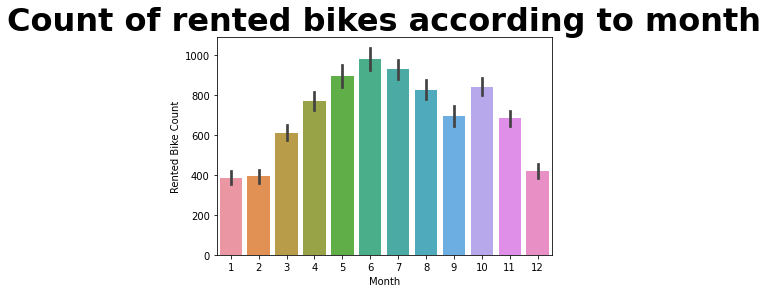

<Figure size 1440x720 with 0 Axes>

In [26]:
graph1=sns.barplot(x='Month',y='Rented Bike Count',data=bike_df)
plt.figure(figsize=(20,10))
graph1.set_title('Count of rented bikes according to month',fontsize=32,fontweight='bold')

Text(0.5, 1.0, 'Count of rented bikes according to weekdays and weekends')

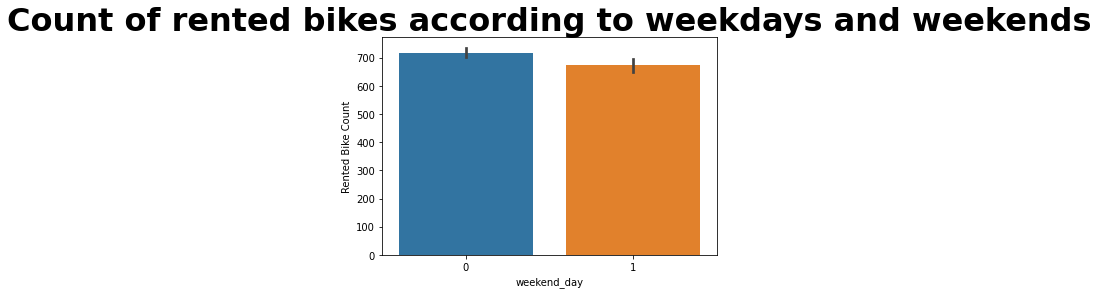

<Figure size 1440x720 with 0 Axes>

In [27]:
graph2=sns.barplot(x='weekend_day',y='Rented Bike Count',data=bike_df)
plt.figure(figsize=(20,10))
graph2.set_title('Count of rented bikes according to weekdays and weekends',fontsize=32,fontweight='bold')

Text(0.5, 1.0, 'Count of rented bikes according to Hour ')

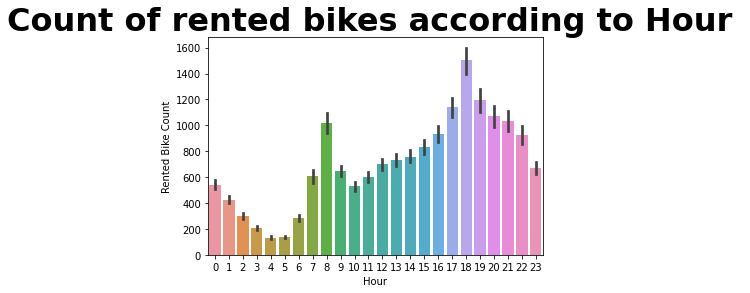

<Figure size 1440x720 with 0 Axes>

In [28]:
graph3=sns.barplot(x='Hour',y='Rented Bike Count',data=bike_df)
plt.figure(figsize=(20,10))
graph3.set_title('Count of rented bikes according to Hour ',fontsize=32,fontweight='bold')

Text(0.5, 1.0, 'Count of rented bikes according to Seasons ')

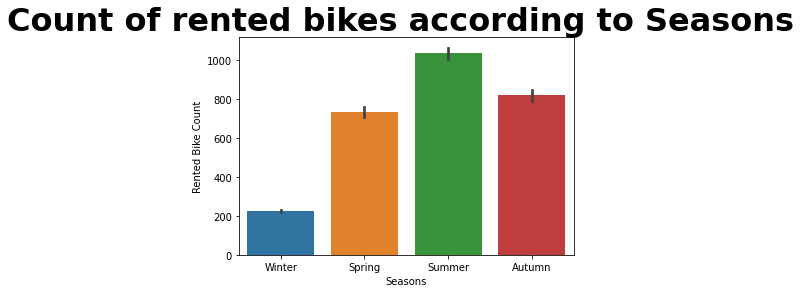

<Figure size 1440x720 with 0 Axes>

In [29]:
graph4=sns.barplot(x='Seasons',y='Rented Bike Count',data=bike_df)
plt.figure(figsize=(20,10))
graph4.set_title('Count of rented bikes according to Seasons ',fontsize=32,fontweight='bold')

Text(0.5, 1.0, 'Count of rented bikes according to Holiday')

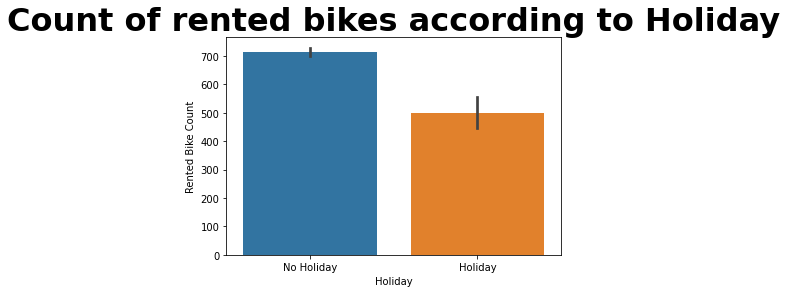

<Figure size 1440x720 with 0 Axes>

In [30]:
graph5=sns.barplot(x='Holiday',y='Rented Bike Count',data=bike_df)
plt.figure(figsize=(20,10))
graph5.set_title('Count of rented bikes according to Holiday',fontsize=32,fontweight='bold')

### ANALYSIS OF NUMERICAL VARIABLE DISPLOTS

In [31]:
numeric_features= df.select_dtypes(exclude='object')
numeric_features

,Rented_Bike_Count,Hour,Temperature,Humidity,Wind_speed,Visibility,Dew_point_temperature,Solar_Radiation,Rainfall,Snowfall
0,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0
1,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0
2,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0
3,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0
4,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
8755,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0
8756,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0
8757,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0
8758,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0


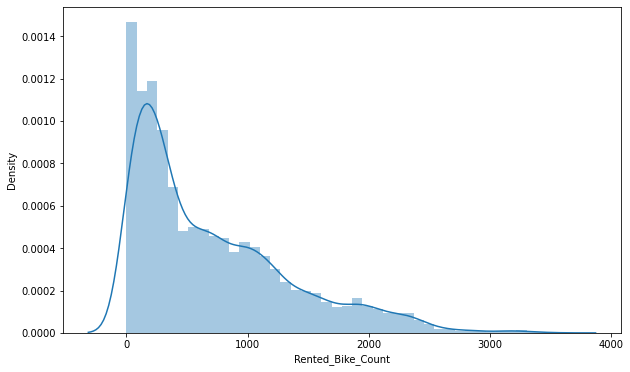

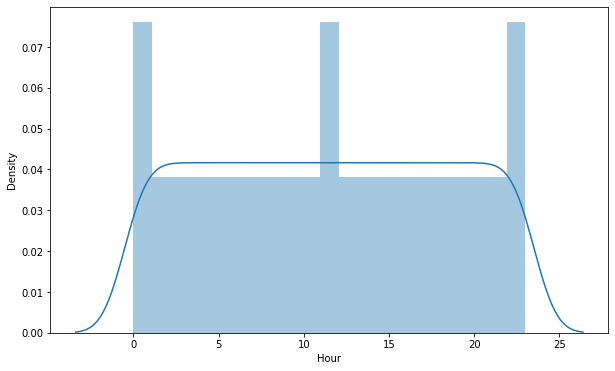

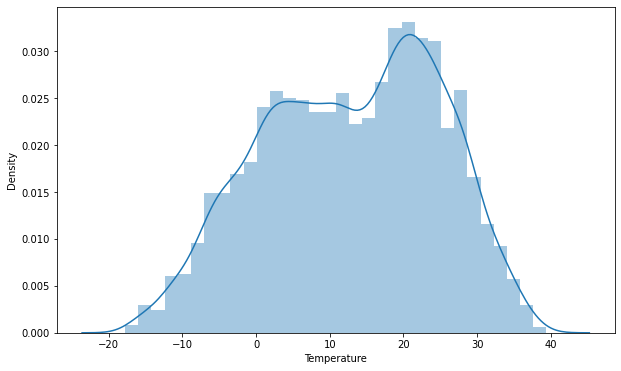

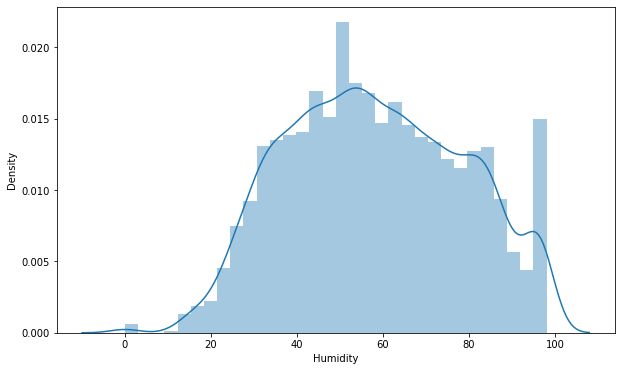

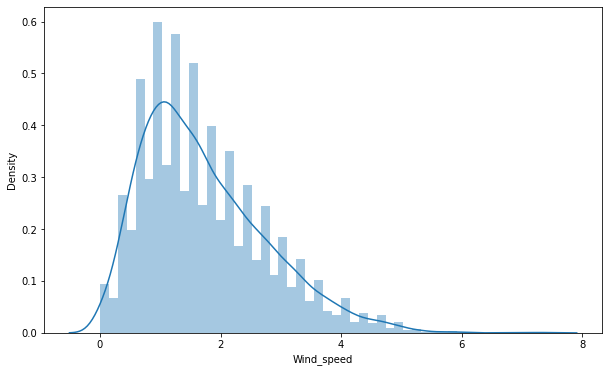

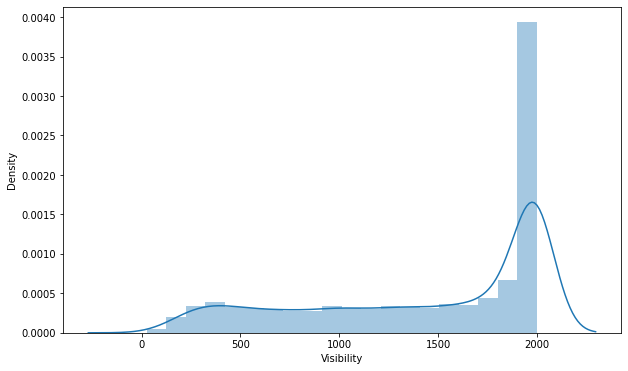

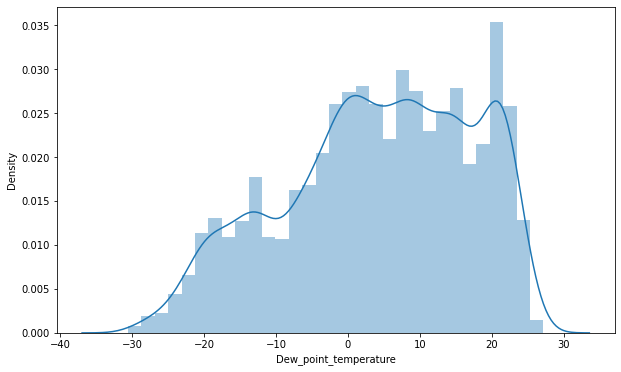

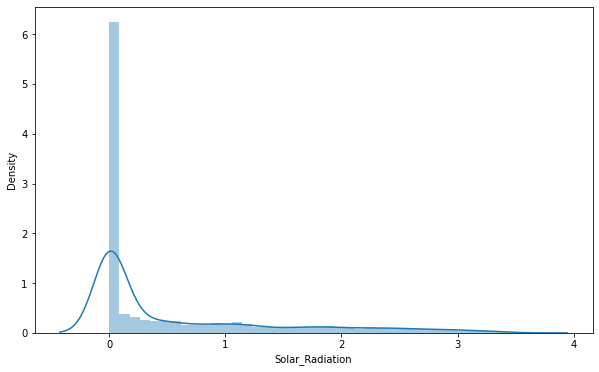

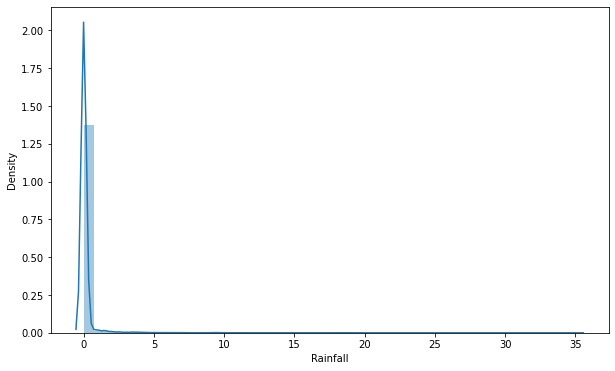

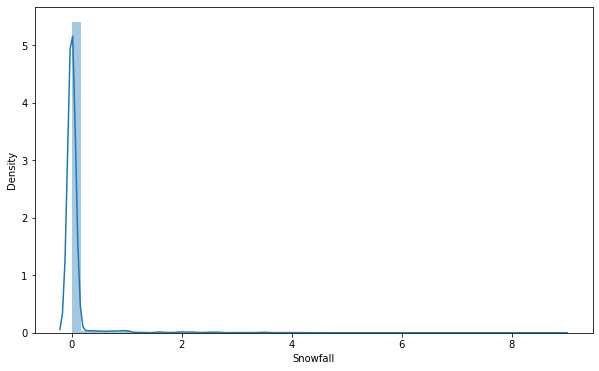

In [32]:
# Printing displots to analyze the distribution of all numerical features
for col in numeric_features:
  plt.figure(figsize=(10,6))
  sns.distplot(x=df[col])
  plt.xlabel(col)
plt.show()


### NUMERICAL VS RENTED BIKE COUNT

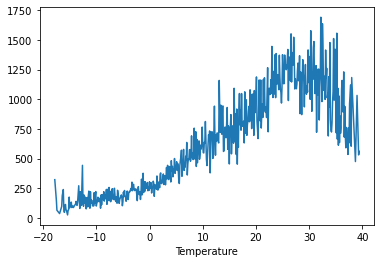

In [33]:
# Plot to Analyze rented bike count and temperature
df.groupby('Temperature').mean()['Rented_Bike_Count'].plot()

From the above graph we can conclude that people like use bikes around 25 degree celcius

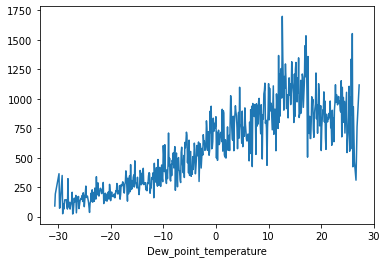

In [34]:
# Plot to Analyze rented bike count and dew point temperature
df.groupby('Dew_point_temperature').mean()['Rented_Bike_Count'].plot()

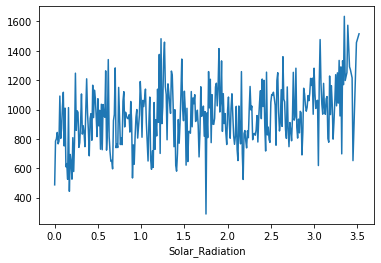

In [35]:
# Plot to Analyze rented bike count and Solar Radiation
df.groupby('Solar_Radiation').mean()['Rented_Bike_Count'].plot()

From the above graph we can see when there is solar radiation the amount of bike rented is high

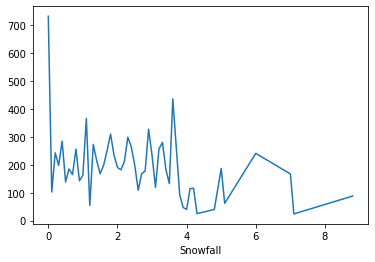

In [36]:
# Plot to Analyze rented bike count and Snowfall
df.groupby('Snowfall').mean()['Rented_Bike_Count'].plot()

From the above graph we can see that the amount of rented bike is very low ehen there is more than 4cm of snow

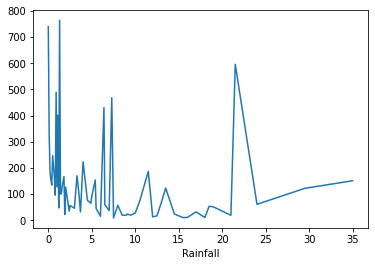

In [37]:
# Plot to Analyze rented bike count and Rainfall
df.groupby('Rainfall').mean()['Rented_Bike_Count'].plot()

From the above graph we can see that even if it rains the amount of rented bike is not decreasing , even if we have 20mm of rain there is a big peak of rented bikes

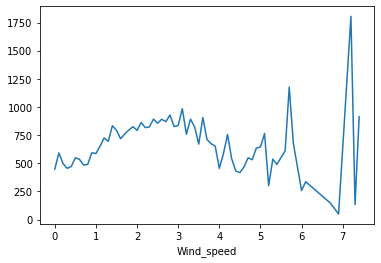

In [38]:
# Plot to Analyze rented bike count and Wind speed
df.groupby('Wind_speed').mean()['Rented_Bike_Count'].plot()

From the above graph we can see the amount of bike rent is uniformly distributed despite of wind speed but when the speed of wind was 7m/s the demand of bike also increases, that means people loves bike journey when it is windy

### REGRESSION PLOT

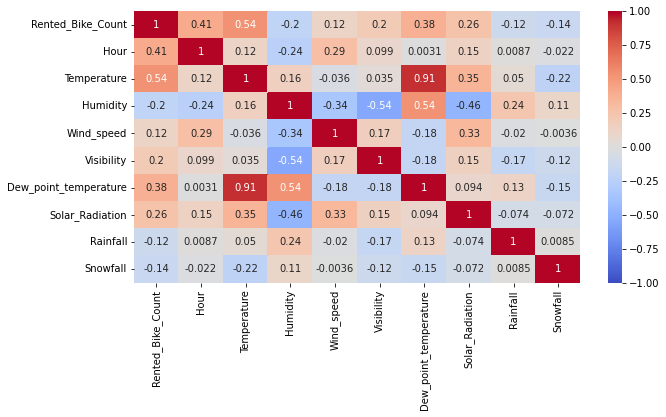

In [44]:
plt.figure(figsize=(10,5))
sns.heatmap(df.corr(), vmin=-1, cmap='coolwarm', annot=True)
plt.show()

In [41]:
#To find out highly correlated variables
df.corr()["Rented_Bike_Count"]

Rented_Bike_Count        1.000000
Hour                     0.410257
Temperature              0.538558
Humidity                -0.199780
Wind_speed               0.121108
Visibility               0.199280
Dew_point_temperature    0.379788
Solar_Radiation          0.261837
Rainfall                -0.123074
Snowfall                -0.141804
Name: Rented_Bike_Count, dtype: float64